# FLIP ROBO TECHNOLOGIES

# NAME: BIJAY PAREEK


# BATCH NO: DS2308


# Projects Evaluation Phase 2:

# Temperature Forecast Project using ML

# Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Attribute Information:

# For more information, read [Cho et al, 2020].

## 1. station - used weather station number: 1 to 25

## 2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

## 3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

## 4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

## 5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

## 6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

## 7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

## 8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

## 9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

## 10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

## 11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

## 12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

## 13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

## 14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

## 15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

## 16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

## 17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

## 18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

## 19. lat - Latitude (Â°): 37.456 to 37.645

## 20. lon - Longitude (Â°): 126.826 to 127.135

## 21. DEM - Elevation (m): 12.4 to 212.3

## 22. Slope - Slope (Â°): 0.1 to 5.2

## 23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

## 24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

## 25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

# You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

# Dataset Link-

https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv



# Import necessary libary:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np  

# Loading the dataset:

In [2]:
df = pd.read_csv(r"C:/Users/raj/Downloads/temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
print("Here we will see the total column name = ",
      df.columns)

Here we will see the total column name =  Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')


In [4]:
print("Here we will see the total rows and columns in the dataset = ",df.shape)

Here we will see the total rows and columns in the dataset =  (7752, 25)


# Now we will see the few records from the dataset:

In [5]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# [Data Exploration and Preprocessing]

# Here we will see overview of dataset:

In [6]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


# observation of basis statistics:

# Column Names:

The dataset has 24 columns, and based on the previous context, these columns represent various weather-related features. Some of the key features include temperature (Present_Tmax, Present_Tmin, Next_Tmax, Next_Tmin), humidity (LDAPS_RHmin, LDAPS_RHmax), wind speed (LDAPS_WS), and geographical information (lat, lon, DEM, Slope, Solar radiation).

# Rows:
The statistics are calculated for each column, providing information such as the count of non-null values, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum.

# observation of a few columns:

## 1.Present_Tmax:

Mean maximum air temperature between 0 and 21 h on the present day is around 29.77°C.

Standard deviation is approximately 2.97°C.

Minimum value is 20°C, and the maximum is 37.6°C.

## 2.LDAPS_RHmin:

LDAPS model forecast of next-day minimum relative humidity has a mean of around 56.76%.

The standard deviation is approximately 14.67%.

Minimum relative humidity forecast is 19.8%, and the maximum is 98.5%.

## 3.Solar radiation:

Daily incoming solar radiation has a mean of around 5341.50 wh/m2.

The standard deviation is approximately 429.16 wh/m2.

Minimum solar radiation is 4329.52 wh/m2, and the maximum is 5992.90 wh/m2.

## 4.Next_Tmax:

The next-day maximum air temperature has a mean of around 30.27°C.

The standard deviation is approximately 3.13°C.

Minimum value is 17.4°C, and the maximum is 38.9°C.

## 5.Next_Tmin:

The next-day minimum air temperature has a mean of around 22.93°C.

The standard deviation is approximately 2.49°C.

Minimum value is 11.3°C, and the maximum is 29.8°C.

# Now we wil see missing value:

In [7]:
print("Here are the NAN values present in the dataset............")

df.isnull().sum()


Here are the NAN values present in the dataset............


station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

## Note: we can see the nan present in  the dataset and now we will use the [Dropna] for removing the nan:

In [8]:
df.dropna(subset=['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],inplace=True)  

In [9]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

# Thus we remove nan and we can go further for analysis:

# now we will see the outliers present in the dataset using [box plot]:

In [10]:
cols = ['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']

print("Here are the name of the columns used for checking the outliers........")

cols

Here are the name of the columns used for checking the outliers........


['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

Here the box plot looks like------


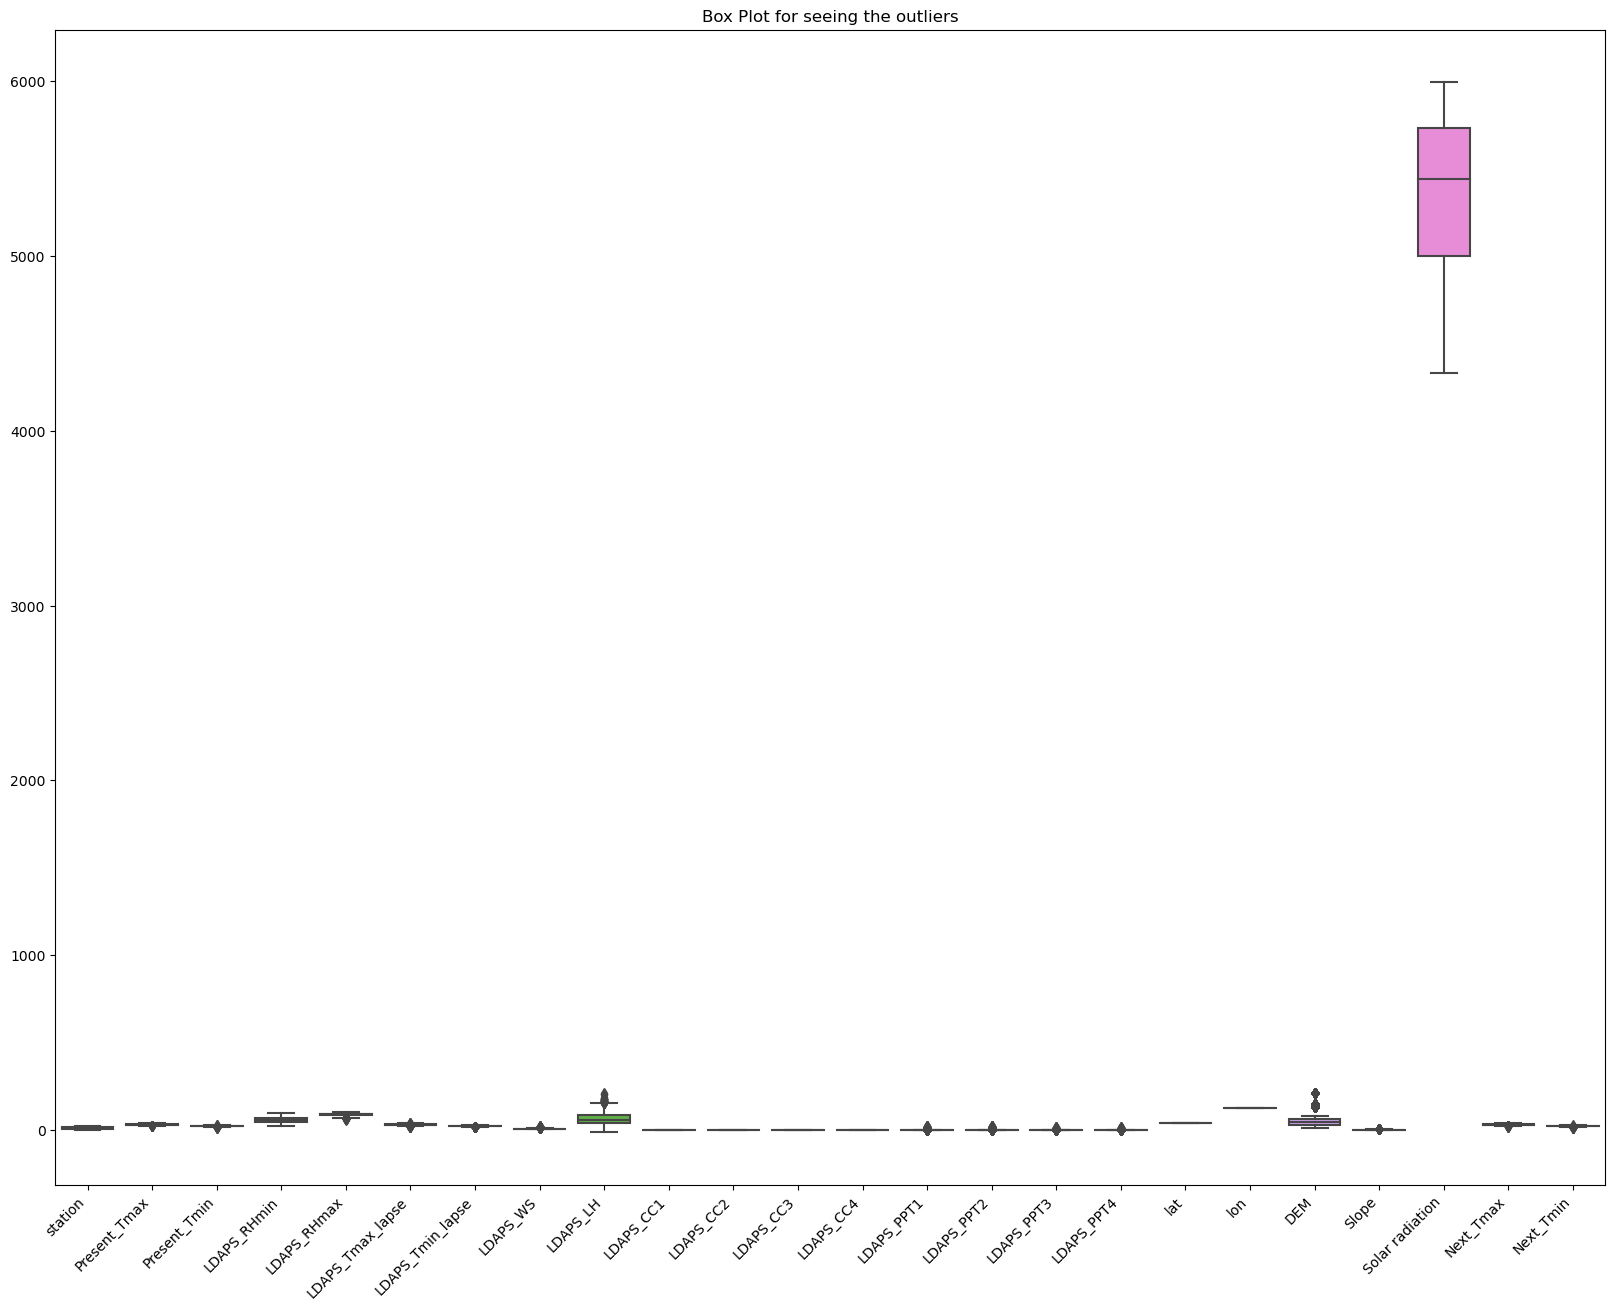

In [11]:
print("Here the box plot looks like------")

plt.figure(figsize=(20, 15))
sns.boxplot(data=df[cols],orient='black')
plt.title('Box Plot for seeing the outliers')
plt.xticks(rotation=45, ha='right')
plt.show()

# Note: we can see outliers in the dataset and we have to remove the outliers:

In [12]:
print("Here we define  the function for removing the outliers--------- ")

def remove_outliers(df, columns):
    for column in columns:
        # Calculate the IQR for each column
        Q1 = df[cols].quantile(0.25)
        Q3 = df[cols].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df = df[(df[cols] >= lower_bound) & (df[cols] <= upper_bound)]

    return df

Here we define  the function for removing the outliers--------- 


In [13]:
df_without_outliers = remove_outliers(df, cols)

print("Here is the df_without_outliers")
df_without_outliers

Here is the df_without_outliers


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,NaN,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,NaN,2.7850,5992.895996,29.1,21.2
1,2.0,NaN,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,NaN,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,NaN,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,NaN,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,NaN,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,NaN,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,NaN,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,NaN,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


Here we see the dataset after removing the outliers


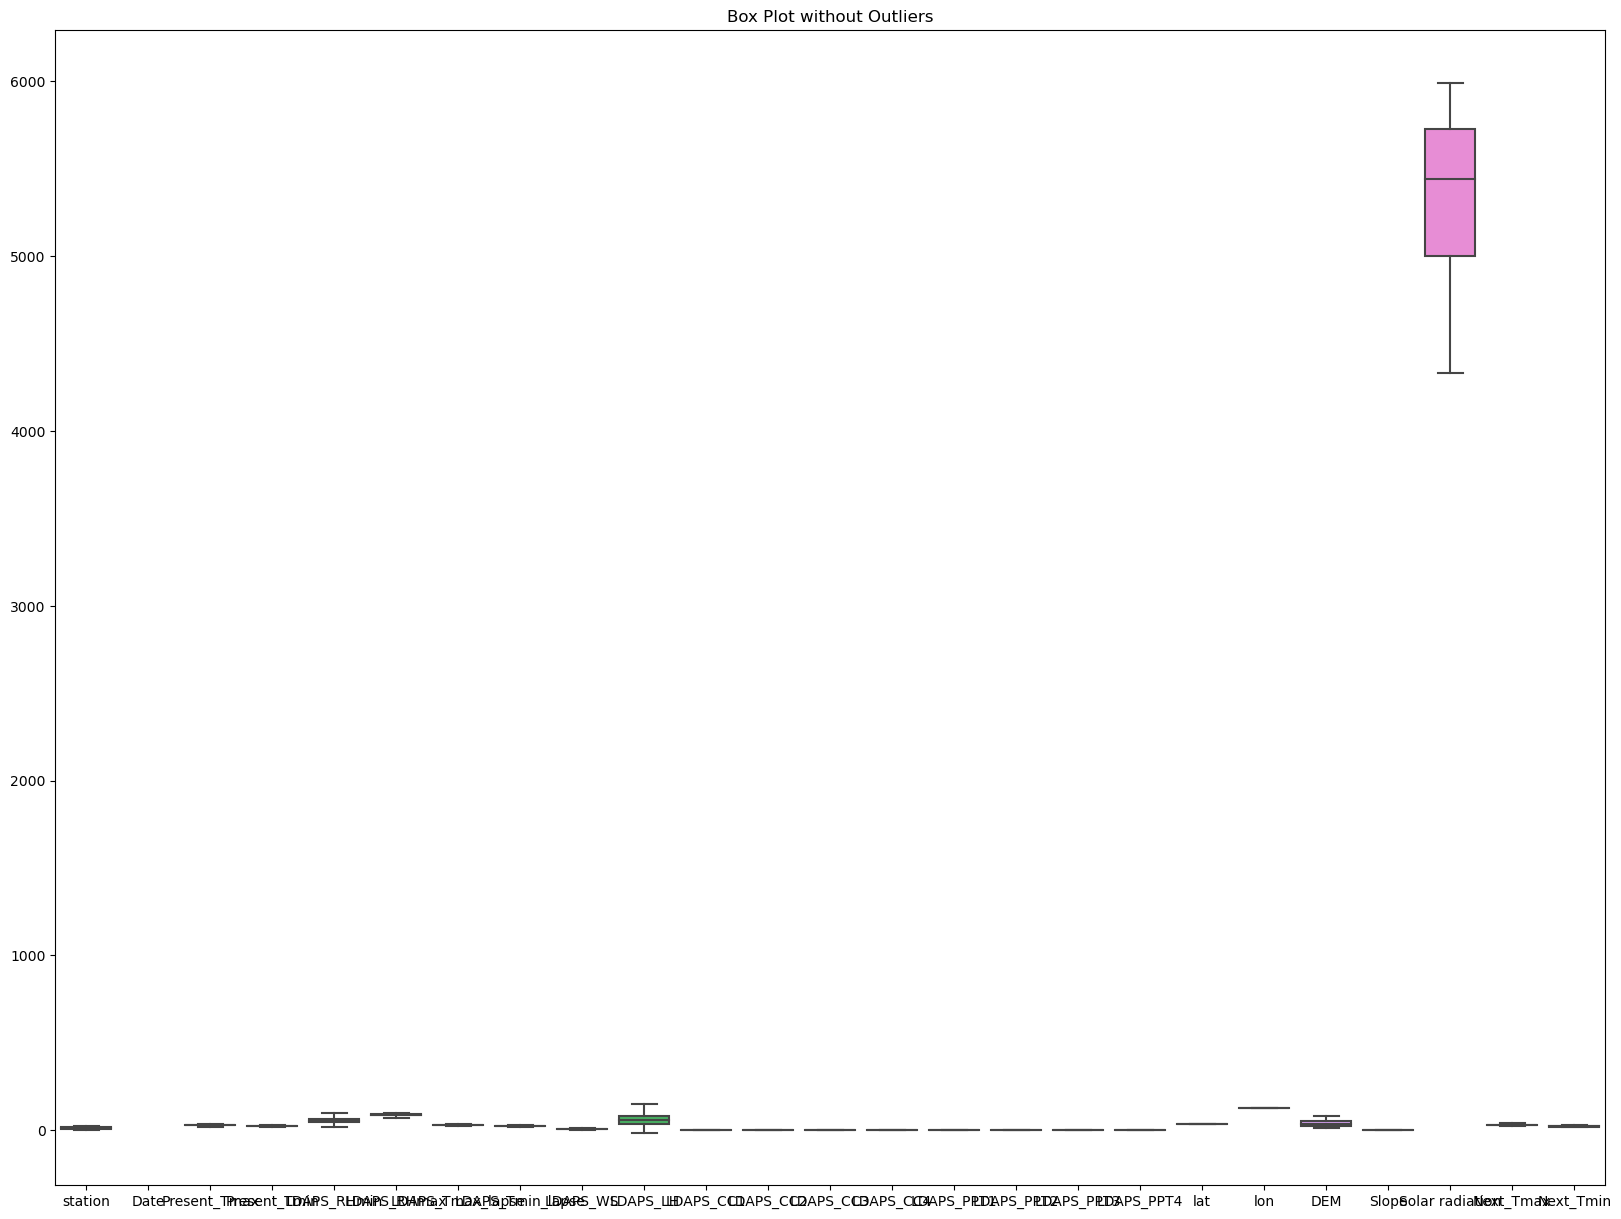

In [14]:
print("Here we see the dataset after removing the outliers")
plt.figure(figsize=(20, 15))
sns.boxplot(data=df_without_outliers[cols], orient='v')
plt.title('Box Plot without Outliers')
plt.show()

# Thus we removed the outliers:

# Now we will removed the unwanted column:

In [15]:
df.drop(['station','Date'],1,inplace=True)
df

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


# Extract features and target variables for minimum and maximum temperatures

In [16]:
X_min = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y_min = df['Next_Tmin']

In [17]:
X_min

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535


In [18]:
y_min

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 7588, dtype: float64

In [19]:
X_max = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y_max = df['Next_Tmax']

In [20]:
X_max

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535


In [21]:
y_max

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7588, dtype: float64

# Standardize the features using StandardScaler.

In [22]:
scaler = StandardScaler()
X_min_scaled = scaler.fit_transform(X_min)
X_max_scaled = scaler.fit_transform(X_max)

In [23]:
X_min_scaled

array([[-0.35331763, -0.74802891,  0.10466029, ...,  2.76909065,
         1.11116193,  1.51056517],
       [ 0.72513836, -0.66472063, -0.3050523 , ..., -0.31582755,
        -0.54321979,  1.22299734],
       [ 0.62403311,  0.0433998 , -0.54934444, ..., -0.52671876,
        -0.72389118,  1.20960169],
       ...,
       [-2.17321212, -2.53915704, -2.05008127, ..., -0.85291936,
        -0.80453765, -2.09517477],
       [-2.17321212, -2.28923218, -2.23473536, ..., -0.82147603,
        -0.75580008, -2.10667071],
       [-2.20691387, -2.41419461, -2.310467  , ..., -0.7793405 ,
        -0.72010291, -2.07648676]])

In [24]:
X_max_scaled

array([[-0.35331763, -0.74802891,  0.10466029, ...,  2.76909065,
         1.11116193,  1.51056517],
       [ 0.72513836, -0.66472063, -0.3050523 , ..., -0.31582755,
        -0.54321979,  1.22299734],
       [ 0.62403311,  0.0433998 , -0.54934444, ..., -0.52671876,
        -0.72389118,  1.20960169],
       ...,
       [-2.17321212, -2.53915704, -2.05008127, ..., -0.85291936,
        -0.80453765, -2.09517477],
       [-2.17321212, -2.28923218, -2.23473536, ..., -0.82147603,
        -0.75580008, -2.10667071],
       [-2.20691387, -2.41419461, -2.310467  , ..., -0.7793405 ,
        -0.72010291, -2.07648676]])

# Note we can see the after the standarised the data we can see negative sign in each elements 

## using the numpy.abs() function, which returns the absolute value of each element. The absolute value essentially removes the sign, making all values positive.

In [25]:
X_min_scaled = np.abs(scaler.fit_transform(X_min))
X_max_scaled = np.abs(scaler.fit_transform(X_max))

In [26]:
X_min_scaled

array([[0.35331763, 0.74802891, 0.10466029, ..., 2.76909065, 1.11116193,
        1.51056517],
       [0.72513836, 0.66472063, 0.3050523 , ..., 0.31582755, 0.54321979,
        1.22299734],
       [0.62403311, 0.0433998 , 0.54934444, ..., 0.52671876, 0.72389118,
        1.20960169],
       ...,
       [2.17321212, 2.53915704, 2.05008127, ..., 0.85291936, 0.80453765,
        2.09517477],
       [2.17321212, 2.28923218, 2.23473536, ..., 0.82147603, 0.75580008,
        2.10667071],
       [2.20691387, 2.41419461, 2.310467  , ..., 0.7793405 , 0.72010291,
        2.07648676]])

In [27]:
X_max_scaled

array([[0.35331763, 0.74802891, 0.10466029, ..., 2.76909065, 1.11116193,
        1.51056517],
       [0.72513836, 0.66472063, 0.3050523 , ..., 0.31582755, 0.54321979,
        1.22299734],
       [0.62403311, 0.0433998 , 0.54934444, ..., 0.52671876, 0.72389118,
        1.20960169],
       ...,
       [2.17321212, 2.53915704, 2.05008127, ..., 0.85291936, 0.80453765,
        2.09517477],
       [2.17321212, 2.28923218, 2.23473536, ..., 0.82147603, 0.75580008,
        2.10667071],
       [2.20691387, 2.41419461, 2.310467  , ..., 0.7793405 , 0.72010291,
        2.07648676]])

# Train-Test Split:

In [28]:
X_min_train, X_min_test, y_min_train, y_min_test = train_test_split(X_min_scaled, y_min, test_size=0.2, random_state=42)

In [29]:
X_max_train, X_max_test, y_max_train, y_max_test = train_test_split(X_max_scaled, y_max, test_size=0.2, random_state=42)

# [Model Training]

Training the  separate models for minimum and maximum temperatures. I use different algorithms such as

Linear Regression or Random Forest Regression.



# Model for Next_Tmin:

In [30]:
model_min = LinearRegression()
print("Here we can see the model for Next_Trim = ",model_min)

Here we can see the model for Next_Trim =  LinearRegression()


In [31]:
model_min.fit(X_min_train, y_min_train)

LinearRegression()

# Model Evaluation:
## Evaluate the performance of the models using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

# Predictions for Next_Tmin:

In [32]:
y_min_pred = model_min.predict(X_min_test)

print("Here is the prediction for Next_Trim = ",y_min_pred)

Here is the prediction for Next_Trim =  [23.06766338 21.58856237 23.05830475 ... 19.03851434 23.14741018
 23.67307583]


# Evaluation for Next_Tmin:

In [33]:
print("The Next_Tmin Model Evaluation is = ")

print("The result of MAE is = ", mean_absolute_error(y_min_test, y_min_pred))

print("The result of MSE is = ", mean_squared_error(y_min_test, y_min_pred))

print("The result of R-squared is = ", r2_score(y_min_test, y_min_pred))


The Next_Tmin Model Evaluation is = 
The result of MAE is =  1.5352858717358007
The result of MSE is =  3.7804867995246614
The result of R-squared is =  0.38460457905321344


# Visualization for Next_Tmin:

Here we can see the clear graph of Next_Tmin actual and predict------


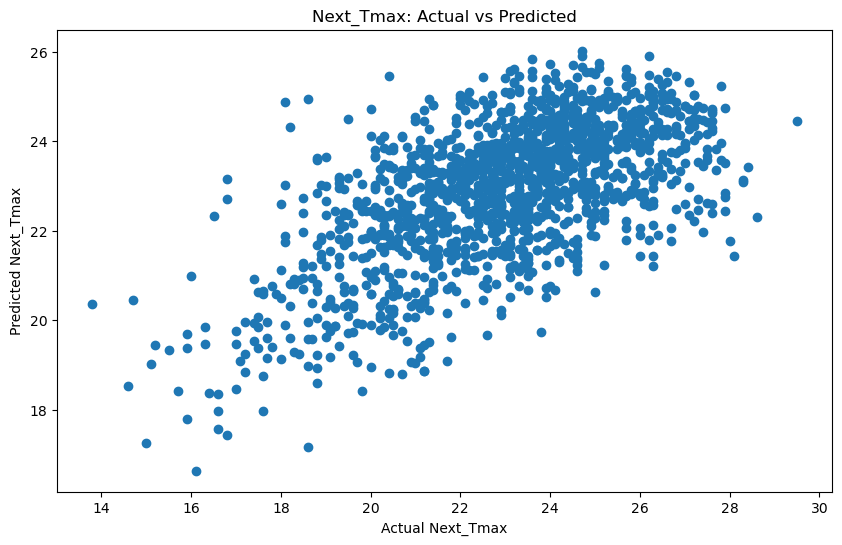

In [34]:
print("Here we can see the clear graph of Next_Tmin actual and predict------")

plt.figure(figsize=(10, 6))
plt.scatter(y_min_test, y_min_pred)
plt.xlabel('Actual Next_Tmax')
plt.ylabel('Predicted Next_Tmax')
plt.title('Next_Tmax: Actual vs Predicted')
plt.show()

# Now we will the actual and predict data in the seprate columns respectively:

In [35]:
actual=np.array(y_min_test)
actual

array([24.5, 21.5, 24.7, ..., 21. , 19.3, 20.1])

In [36]:
predicted=np.array(y_min_pred)
predicted

array([23.06766338, 21.58856237, 23.05830475, ..., 19.03851434,
       23.14741018, 23.67307583])

# [comparing the actual and predicted values for Next_Tmin]:

In [37]:
df_comparing_Next_Tmin=pd.DataFrame({"actual values":actual,"predicted values":predicted})
df_comparing_Next_Tmin

,actual values,predicted values
0,24.5,23.067663
1,21.5,21.588562
2,24.7,23.058305
3,22.5,20.458421
4,23.3,23.104560
...,...,...
1513,24.9,23.085337
1514,24.7,25.905193
1515,21.0,19.038514
1516,19.3,23.147410


# Conclusion:

## Note: For Next_Tmin we used the Linear Regression and the outcome is

The Next_Tmin Model Evaluation is = 

The result of MAE is =  1.5352858717358007

The result of MSE is =  3.7804867995246614

The result of R-squared is =  0.38460457905321344

Note: After passing the actual and predict and looking at the scatter plot i can say model perform well.


# Now we create the model for Next_Tmax:

In [38]:
model_max = RandomForestRegressor()

print("Here we can see the model for Next_Tmax = ",model_max )

Here we can see the model for Next_Tmax =  RandomForestRegressor()


In [39]:
model_max.fit(X_max_train, y_max_train)

RandomForestRegressor()

# Predictions for Next_Tmax:

In [40]:
y_max_pred = model_max.predict(X_max_test)

print("Here is the predictiion for Next_Tmax = ",y_max_pred)

Here is the predictiion for Next_Tmax =  [29.273 26.002 33.674 ... 30.553 24.444 25.942]


# Evaluation for Next_Tmax:

In [41]:
print("The Next_Tmax Model Evaluation is = ")

print("The result of MAE is = ", mean_absolute_error(y_max_test, y_max_pred))

print("The result of MSE is =", mean_squared_error(y_max_test, y_max_pred))

print(" The result of R-squared is = ", r2_score(y_max_test, y_max_pred))

The Next_Tmax Model Evaluation is = 
The result of MAE is =  0.9293774703557314
The result of MSE is = 1.6190126027667988
 The result of R-squared is =  0.8280840531478456


# Visualization for Next_Tmax:

Here we can see the clear graph of Next_Tmax actual and predict------


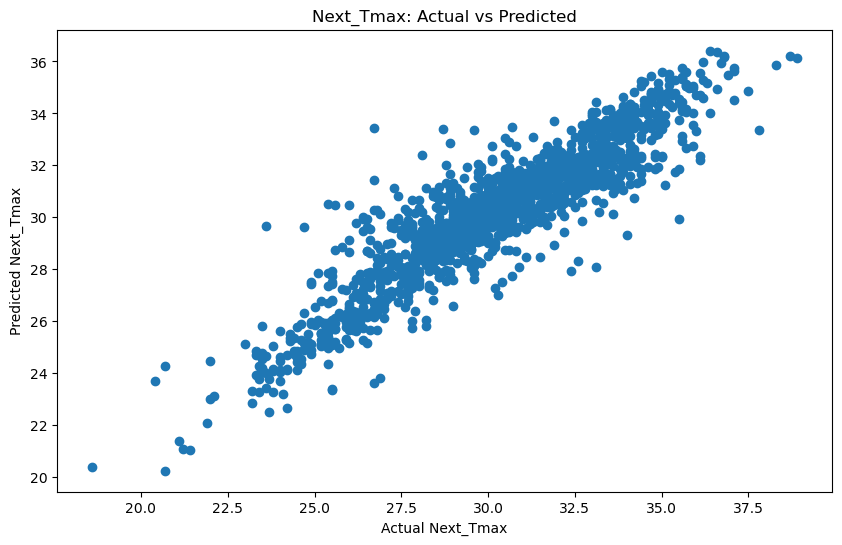

In [42]:
print("Here we can see the clear graph of Next_Tmax actual and predict------")

plt.figure(figsize=(10, 6))
plt.scatter(y_max_test, y_max_pred)
plt.xlabel('Actual Next_Tmax')
plt.ylabel('Predicted Next_Tmax')
plt.title('Next_Tmax: Actual vs Predicted')
plt.show()

# Now we will the actual and predict data in the seprate columns respectively:

In [43]:
actual=np.array(y_max_test)
actual

array([28.7, 27.8, 33.6, ..., 30. , 22. , 25.9])

In [44]:
predicted=np.array(y_max_pred)
predicted

array([29.273, 26.002, 33.674, ..., 30.553, 24.444, 25.942])

# [comparing the actual and predicted values for Next_Tmax]:

In [45]:
df_comparing=pd.DataFrame({"actual values":actual,"predicted values":predicted})
df_comparing

,actual values,predicted values
0,28.7,29.273
1,27.8,26.002
2,33.6,33.674
3,25.5,26.786
4,29.4,29.008
...,...,...
1513,32.5,31.476
1514,34.7,33.641
1515,30.0,30.553
1516,22.0,24.444


# conclusion:

## Note: For Next_Tmax we used the Linear Regression and the outcome is

The Next_Tmax Model Evaluation is = 
The result of MAE is =  0.9293774703557314
The result of MSE is = 1.6190126027667988
The result of R-squared is =  0.8280840531478456

## Note: After passing the actual and predict and looking at the scatter plot i can say model perform well.

In [46]:
################################################Thank you###################################################################